In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_df = pd.read_csv('Resources/city_data.csv')
ride_data_df = pd.read_csv('Resources/ride_data.csv')

In [3]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
# Get the unique values of the type of city.
city_data_df.groupby('type').count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


In [6]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=['city', 'city'], how='left')

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
# Create dataframes for each type of city.
urban_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
suburban_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [8]:
# total number of rides for each city type.
urban_ride_count = urban_df.groupby('city').count()['ride_id']
suburban_ride_count = suburban_df.groupby('city').count()['ride_id']
rural_ride_count = rural_df.groupby('city').count()['ride_id']

In [9]:
# Find average fare for each city type.
urban_avg_fare = urban_df.groupby('city').mean()['fare']
suburban_avg_fare = suburban_df.groupby('city').mean()['fare']
rural_avg_fare = rural_df.groupby('city').mean()['fare']

In [10]:
# Find the average number of drivers for each city type.
urban_driver_count = urban_df.groupby('city').mean()['driver_count']
suburban_driver_count = suburban_df.groupby('city').mean()['driver_count']
rural_driver_count = rural_df.groupby('city').mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

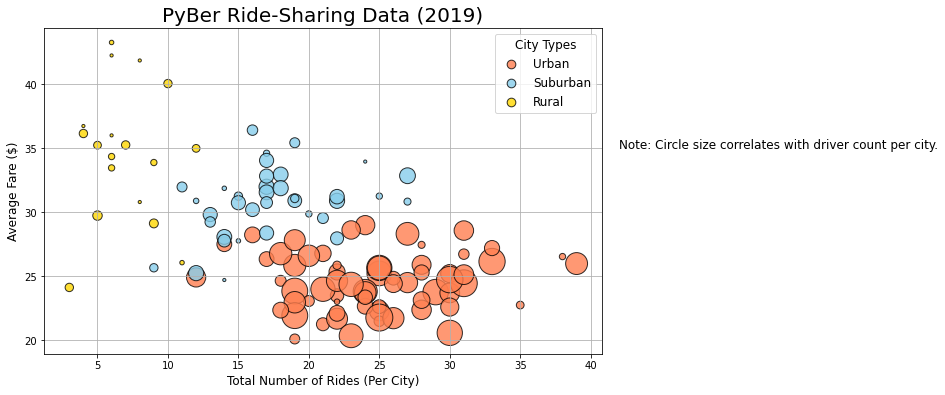

In [11]:
# Create scatter plot for each city type.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c='coral', edgecolor='black', linewidths=1, alpha=0.8, label='Urban')
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color='skyblue', edgecolor='black', linewidths=1, alpha=0.8, label='Suburban')
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c='gold', edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

# Formatting
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.grid(True)

# Adjusting the legend.
lgnd = plt.legend(fontsize='12', mode='Expanded',
                 scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize='12')

#Save the figure.
plt.savefig('analysis/Fig1.png')

plt.show()

In [12]:
# Get summary statistics(Urban)
urban_df.describe()[['fare', 'driver_count']]

,fare,driver_count
count,1625.000000,1625.000000
mean,24.525772,36.678154
std,11.738649,20.075545
min,4.050000,3.000000
25%,14.550000,22.000000
50%,24.640000,37.000000
75%,34.580000,52.000000
max,44.970000,73.000000


In [13]:
# Get summary statistics(Suburban)
suburban_df.describe()[['fare', 'driver_count']]

,fare,driver_count
count,625.000000,625.000000
mean,30.970128,13.712000
std,10.677508,8.042372
min,12.050000,1.000000
25%,21.970000,5.000000
50%,30.750000,16.000000
75%,39.830000,21.000000
max,49.960000,25.000000


In [14]:
# Get summary statistics(Rural)
rural_df.describe()[['fare', 'driver_count']]

,fare,driver_count
count,125.000000,125.000000
mean,34.623440,4.296000
std,14.558046,2.691156
min,10.110000,1.000000
25%,19.900000,1.000000
50%,37.050000,4.000000
75%,47.070000,7.000000
max,58.550000,9.000000


In [39]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [16]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [17]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [18]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [19]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [20]:
# Calculate the mode of the ride count for each city type.
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [21]:
# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [22]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for ride counts for urban trips is {median_urban_ride_count}.')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}.')

The mean for the ride counts for urban trips is 24.62.
The median for ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [23]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f'The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.')

median_suburban_ride_count = np.median(suburban_ride_count)
print(f'The median for ride counts for suburban trips is {median_suburban_ride_count}.')

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.')

The mean for the ride counts for suburban trips is 17.36.
The median for ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [24]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f'The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.')

median_rural_ride_count = np.median(rural_ride_count)
print(f'The median for ride counts for rural trips is {median_rural_ride_count}.')

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'The mode for the ride counts for rural trips is {mode_rural_ride_count}.')

The mean for the ride counts for rural trips is 6.94.
The median for ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


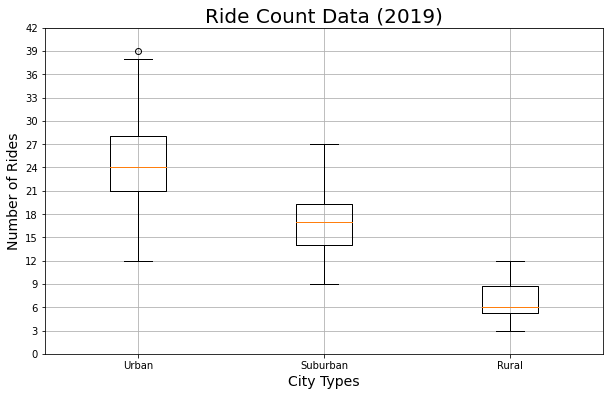

In [46]:
# Create a box-and-whister plot for the urban cities ride count.
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fix, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels = x_labels)

# Formatting
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig('analysis/Fig2.png')
plt.show()

In [47]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


In [25]:
# Create fares lists for reach city type.
urban_fares = urban_df['fare']
suburban_fares = suburban_df['fare']
rural_fares = rural_df['fare']

In [26]:
# Calculate measures of central tendency for urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f'The mean fare price for urban trips is ${mean_urban_fares:.2f}.')

median_urban_fares = np.median(urban_fares)
print(f'The median fare price for urban trips is ${median_urban_fares}.')

mode_urban_fares = sts.mode(urban_fares)
print(f'The mode fare price for urban trips is ${mode_urban_fares}.')

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [27]:
# Calculate measures of central tendency for suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f'The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.')

median_suburban_fares = np.median(suburban_fares)
print(f'The median fare price for suburban trips is ${median_suburban_fares}.')

mode_suburban_fares = sts.mode(suburban_fares)
print(f'The mode fare price for suburban trips is ${mode_suburban_fares}.')

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [28]:
# Calculate measures of central tendency for rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f'The mean fare price for rural trips is ${mean_rural_fares:.2f}.')

median_rural_fares = np.median(rural_fares)
print(f'The median fare price for rural trips is ${median_rural_fares}.')

mode_rural_fares = sts.mode(rural_fares)
print(f'The mode fare price for rural trips is ${mode_rural_fares}.')

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


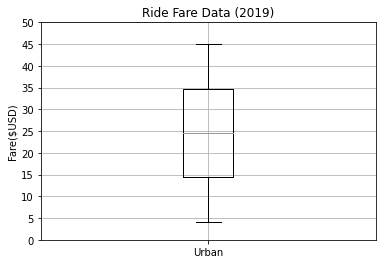

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [48]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

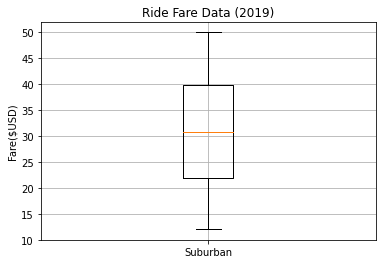

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [50]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(10,53, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

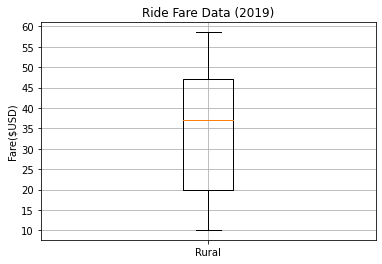

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [53]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(10,62, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

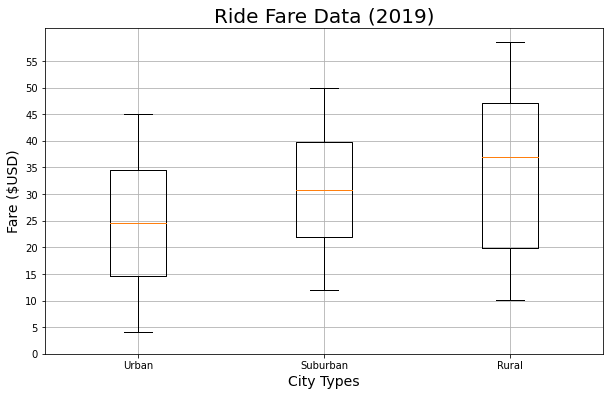

In [54]:
# Create a box-and-whisker plot for all three city types' fare data.
x_labels = ['Urban', 'Suburban', 'Rural']
fares_data = [urban_fares, suburban_fares, rural_fares]
fix, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fares_data, labels = x_labels)

# Formatting
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0,60, step=5.0))
ax.grid()

# Save the figure.
plt.savefig('analysis/Fig3.png')
plt.show()

In [29]:
# Get driver count data from dfs.
urban_drivers = urban_df['driver_count']
suburban_drivers = suburban_df['driver_count']
rural_drivers = rural_df['driver_count']

In [30]:
# Calculate measures of central tendency for urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f'The mean driver count for urban cities is {mean_urban_drivers:.2f}.')

median_urban_drivers = np.median(urban_drivers)
print(f'The median driver count for urban cities is {median_urban_drivers}.')

mode_urban_drivers = sts.mode(urban_drivers)
print(f'The mode driver count for urban cities is {mode_urban_drivers}.')

The mean driver count for urban cities is 36.68.
The median driver count for urban cities is 37.0.
The mode driver count for urban cities is ModeResult(mode=array([39]), count=array([86])).


In [31]:
# Calculate measures of central tendency for suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f'The mean driver count for suburban cities is {mean_suburban_drivers:.2f}.')

median_suburban_drivers = np.median(suburban_drivers)
print(f'The median driver count for suburban cities is {median_suburban_drivers}.')

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f'The mode driver count for suburban cities is {mode_suburban_drivers}.')

The mean driver count for suburban cities is 13.71.
The median driver count for suburban cities is 16.0.
The mode driver count for suburban cities is ModeResult(mode=array([20]), count=array([79])).


In [56]:
# Calculate measures of central tendency for rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f'The mean driver count for rural cities is {mean_rural_drivers:.2f}.')

median_rural_drivers = np.median(rural_drivers)
print(f'The median driver count for rural cities is {median_rural_drivers}.')

mode_rural_drivers = sts.mode(rural_drivers)
print(f'The mode driver count for rural cities is {mode_rural_drivers}.')

The mean driver count for rural cities is 4.30.
The median driver count for rural cities is 4.0.
The mode driver count for rural cities is ModeResult(mode=array([1]), count=array([32])).


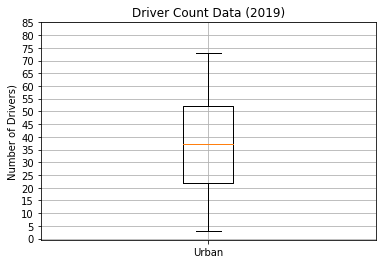

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [57]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

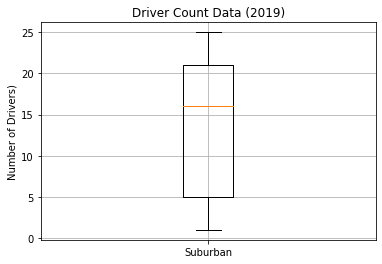

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [59]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 28, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

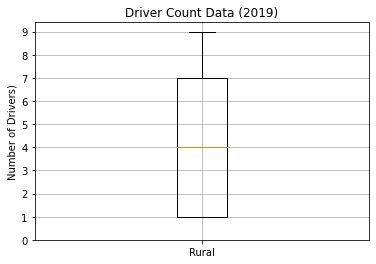

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [61]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 10, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

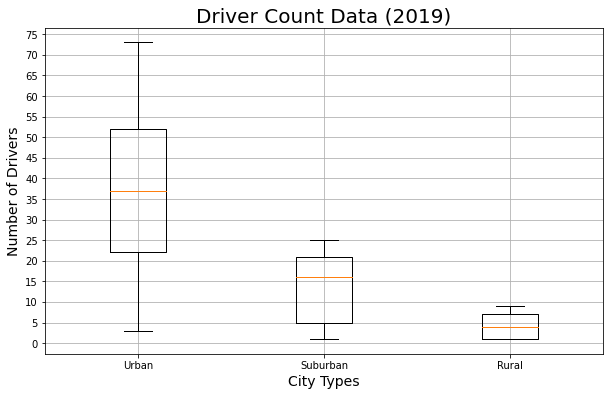

In [62]:
# Create a box-and-whisker plot for all three city types' driver count.
x_labels = ['Urban', 'Suburban', 'Rural']
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fix, ax = plt.subplots(figsize=(10,6))
ax.boxplot(drivers_data, labels = x_labels)

# Formatting
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0,77, step=5.0))
ax.grid()

# Save the figure.
plt.savefig('analysis/Fig4.png')
plt.show()